### Uber Data Analysis

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

# Questions You Might Address in Your Project:
#### Q.1 In Which Category do People Book the Most Uber Ride?
#### Q.2 For Which Purpose Do people Book Uber rides the Most?
#### Q.3 At What Time Do People Book Uber Rides the Most?
#### Q.4 On Which Months Do People Book Uber Rides less Frequently ?
#### Q.5 Months Do People Book Uber Rides less Frequently ?
#### Q.6 How Many Miles do People Usually Book a cab For through Uber?

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [249]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/UberDataset.csv", encoding='latin1')

In [250]:
df.shape

(1156, 7)

df.head(3)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preproscessing

In [254]:
df['PURPOSE'].fillna("NOT", inplace=True)

In [255]:
 df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [256]:
##Converting date columns START DATE  END DATE

In [257]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [258]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [259]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [260]:
df['Date'] = pd.to_datetime(df['START_DATE']).dt.date
df['Time'] = pd.to_datetime(df['START_DATE']).dt.hour
df['DayNight'] = pd.cut(
    x=df['Time'], 
    bins=[0, 10, 15, 19, 24], 
    labels=["Morning", "Afternoon", "Evening", "Night"],
    right=False
)

In [261]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayNight
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [262]:
df.dropna(inplace=True)

In [263]:
df.shape

(420, 10)

# Visualization

### Q.1 In Which Category do People Book the Most Uber Rides?
### Q.2 For Which Purpose Do people Book Uber rides the Most?

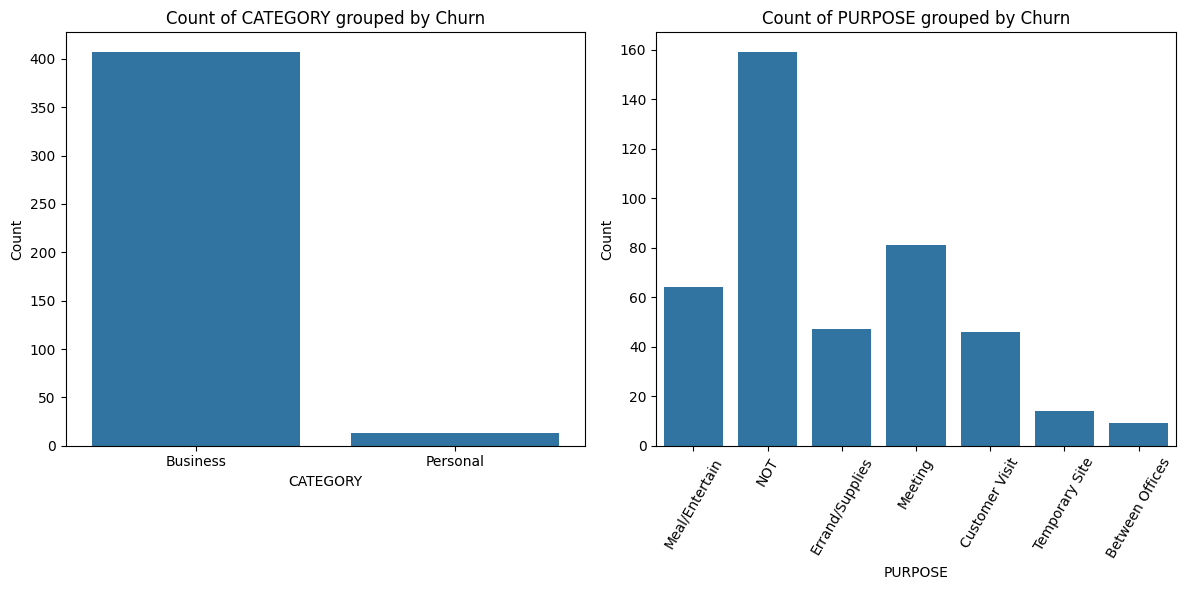

In [266]:

columns = ['CATEGORY', 'PURPOSE']

# Create a grid of subplots (1 row x 2 columns for 2 plots)
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 6))

# Ensure axes is iterable even if there's only one column
if len(columns) == 1:
    axes = [axes]

# Loop through each column and create a countplot in the corresponding subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col} grouped by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    plt.xticks(rotation = 60)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Q.3 At What Time Do People Book Uber Rides the Most

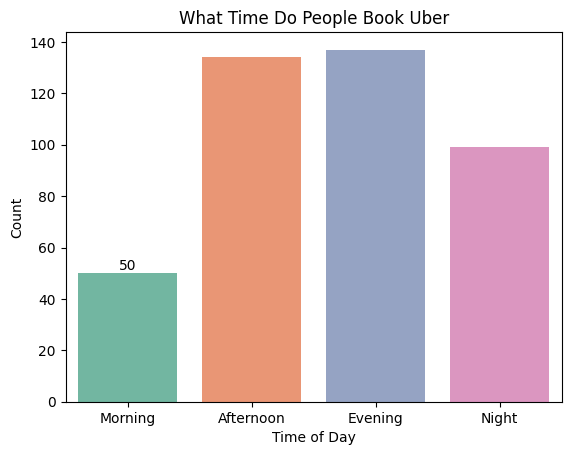

In [268]:
ax = sns.countplot(x="DayNight", data=df, palette="Set2", hue="DayNight", dodge=False)
ax.bar_label(ax.containers[0])
plt.title("What Time Do People Book Uber")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend([],[], frameon=False)  # Remove redundant legend
plt.show()


### Q.4 On Which Months Do People Book Uber Rides less Frequently 

In [270]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayNight
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [271]:
# Extract the month from the 'START_DATE' column
df['Month'] = pd.to_datetime(df['START_DATE']).dt.month

# Define the month labels
month_labels = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr',
    5.0: 'May', 6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug',
    9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}

# Map the month labels to the 'Month' column
df['Month'] = df['Month'].map(month_labels)

# Count the occurrences of each month label
mon = df['Month'].value_counts(sort=False)




In [272]:
df.head(6)



,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayNight,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening,Jan


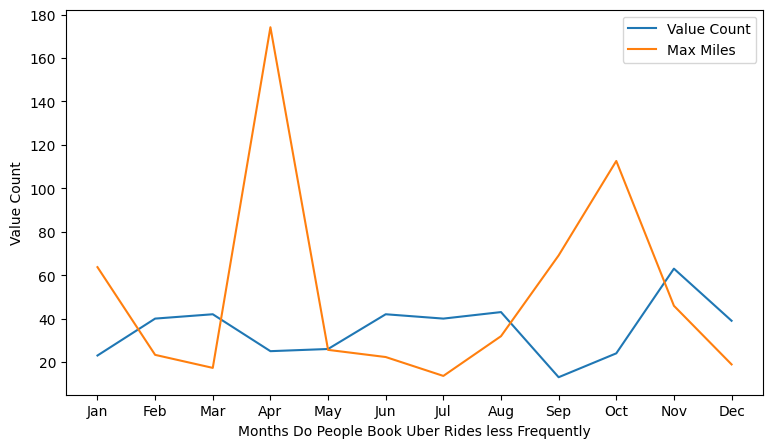

In [273]:
plt.figure(figsize = (9,5))
# Count occurrences of each month
mon = df['Month'].value_counts(sort=False)

# Group by 'Month' and calculate the maximum value in the 'MILES' column
max_miles = df.groupby('Month', sort=False)['MILES'].max()

# Create a new DataFrame with 'Month', 'VALUE COUNT', and 'MAX MILES'
Dataf = pd.DataFrame({
    "Month": mon.index,
    "VALUE COUNT": mon.values,
    "MAX MILES": max_miles.values
})

# Plot using Seaborn lineplot
p = sns.lineplot(data=Dataf, x="Month", y="VALUE COUNT", label="Value Count")
p.set(xlabel="Months Do People Book Uber Rides less Frequently", ylabel="Value Count")

# Optionally, add another line for MAX MILES
sns.lineplot(data=Dataf, x="Month", y="MAX MILES", label="Max Miles", ax=p)

# Show the plot
plt.show()


### Q.5 Months Do People Book Uber Rides less Frequently

In [275]:
# Extract the weekday from the 'START_DATE' column (0 = Mon, 6 = Sun)
df['Day'] = pd.to_datetime(df['START_DATE']).dt.weekday

# Define the Weekdays labels (0 = Mon, 6 = Sun)
Weekdays_labels = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}

# Map the weekday labels to the 'Day' column
df['Day'] = df['Day'].map(Weekdays_labels)

# Count the occurrences of each weekday
week_counts = df['Day'].value_counts(sort=False)




In [276]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayNight,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat


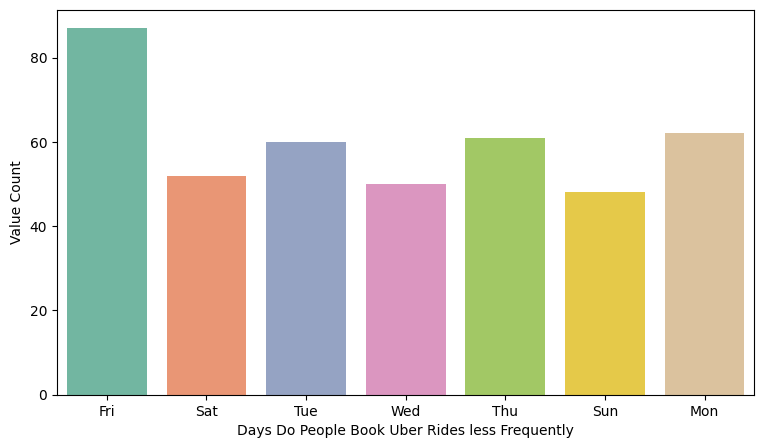

In [277]:

# Set the figure size
plt.figure(figsize=(9, 5))

# Count occurrences of each 'Day'
mon = df['Day'].value_counts(sort=False)

# Group by 'Day' and calculate the maximum value in the 'MILES' column
max_miles = df.groupby('Day', sort=False)['MILES'].max()

# Create a new DataFrame with 'Day', 'VALUE COUNT', and 'MAX MILES'
Dataf = pd.DataFrame({
    "Day": mon.index,
    "VALUE COUNT": mon.values,
    "MAX MILES": max_miles.values
})

# Generate a list of unique colors for each bar
colors = sns.color_palette("Set2", len(Dataf))

# Plot using Seaborn barplot with different colors for each bar
p = sns.barplot(data=Dataf, x="Day", y="VALUE COUNT", hue="Day", palette=colors, legend=False)

# Set the labels and title
p.set(xlabel="Days Do People Book Uber Rides less Frequently", ylabel="Value Count")

# Show the plot
plt.show()


### Q.6 How Many Miles do People Usually Book a cab For through Uber?

In [ ]:
plt.figure(figsize = (11,5))
sns.histplot(x = "MILES", data = df)
plt.show()

In [ ]:
# Create the subplot grid (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for MILES less than 40
sns.histplot(df[df['MILES'] < 40]['MILES'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of MILES < 40")
axes[0].set_xlabel("MILES")
axes[0].set_ylabel("Frequency")

# Plot for MILES greater than or equal to 40
sns.histplot(df[df['MILES'] >= 40]['MILES'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of MILES >= 40")
axes[1].set_xlabel("MILES")
axes[1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
